In [1]:
!pip install citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key = api_keys.api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'--------------------------------')

for city in cities:
    try:
        response= requests.get(f'{url}&q={city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f'Processing Record {record} | {city_record}')
        print(f'{url}&q={city}')
        
        record = record + 1
        
        time.sleep(1.01)
        
    except:
        print("City not found. Skip.")
    continue

print(f'--------------------------------')
print(f'Data Retrieval Complete')
print(f'--------------------------------')

Beginning Data Retrieval
--------------------------------
Processing Record 1 | San Luis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ff994498f5902bfbdeea6e44156c025&q=san luis
Processing Record 2 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ff994498f5902bfbdeea6e44156c025&q=vestmannaeyjar
Processing Record 3 | Lazaro Cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ff994498f5902bfbdeea6e44156c025&q=lazaro cardenas
Processing Record 4 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ff994498f5902bfbdeea6e44156c025&q=cape town
Processing Record 5 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ff994498f5902bfbdeea6e44156c025&q=saskylakh
City not found. Skip.
Processing Record 6 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ff994498f5902bfbdeea6e44156c025&q=atar
Processing Record 7 | Touros
http://api.

In [15]:
weatherpy_dict = {"City": city_name, "Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity":humidity, "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Wind Speed":wind_speed}

In [16]:
weather_data = pd.DataFrame(weatherpy_dict)
weather_data.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [17]:
weather_data.to_csv('weather_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Luis,0,AR,1567042356,45,-33.30,-66.34,71.34,10.33
1,Vestmannaeyjar,93,IS,1567042357,86,63.44,-20.27,49.20,13.09
2,Lazaro Cardenas,75,MX,1567042359,22,28.39,-105.62,91.40,5.82
3,Cape Town,0,ZA,1567042232,86,-33.93,18.42,50.00,1.12
4,Saskylakh,100,RU,1567042361,53,71.97,114.09,52.08,8.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

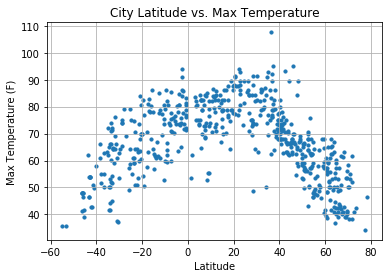

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_vs_CityLatitude.png")
plt.show()

#### Latitude vs. Humidity Plot

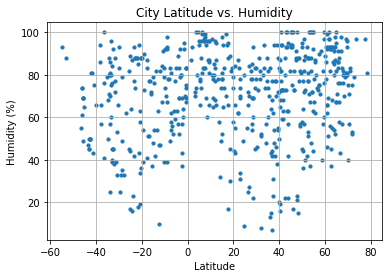

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CityLat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

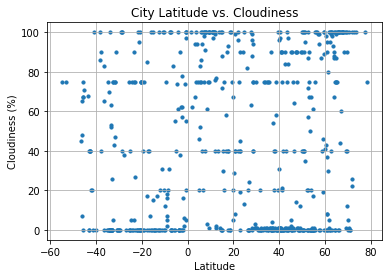

In [21]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CityLat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

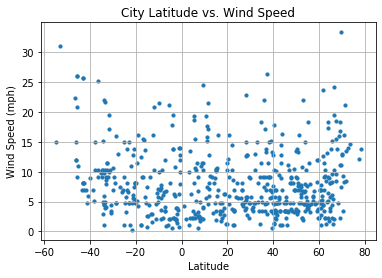

In [22]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CityLat_v_WindSpeed.png")
plt.show()